# 外れ値にラベルをつける②
IsolationForestを使用して、データに含まれる外れ値にラベルをつけます。

```{hint}
[sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
```

## 実験用のデータ

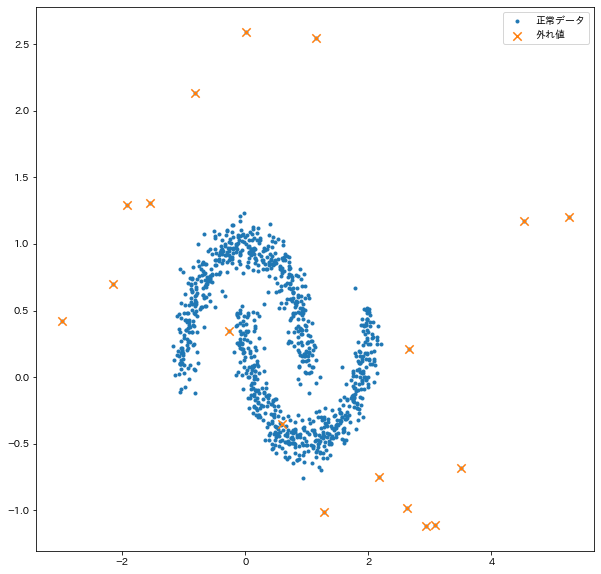

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

np.random.seed(seed=100)
X, y = make_moons(n_samples=1000, noise=0.1)

# 外れ値のインデックス
anom_ind = [i * 50 for i in range(18)]
for an_i in anom_ind:
    X[an_i] *= 2.5


# プロットして確認
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], marker=".", label="正常データ")
plt.scatter(X[:, 0][anom_ind], X[:, 1][anom_ind], marker="x", s=70, label="外れ値")
plt.legend()
plt.show()

## 外れ値を検出する
> contamination‘auto’ or float, default=’auto’
> 
> The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples. 引用元：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

`contamination`パラメタより、外れ値として検出する割合を指定する。

In [2]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators=20, max_samples=200, random_state=100, contamination=0.015
)
clf.fit(X)
detected_anom_index_train = np.where(clf.predict(X) < 0)

## 実際に検出できたかを確認する

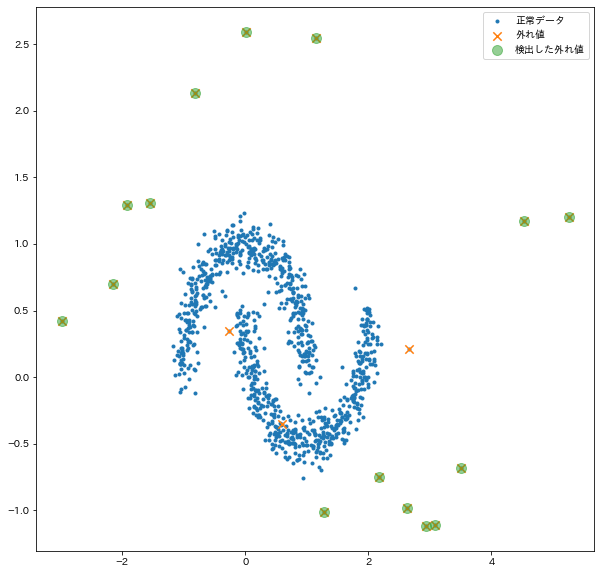

In [3]:
# プロットして確認
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], marker=".", label="正常データ")
plt.scatter(X[:, 0][anom_ind], X[:, 1][anom_ind], marker="x", s=70, label="外れ値")
plt.scatter(
    X[:, 0][detected_anom_index_train],
    X[:, 1][detected_anom_index_train],
    marker="o",
    s=100,
    label="検出した外れ値",
    alpha=0.5,
)
plt.legend()
plt.show()